In [101]:
import yfinance as yf

In [102]:
SOL_ticker=yf.Ticker("SOL-USD")

In [103]:
SOL=SOL_ticker.history(period="max")
SOL

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-04-10 00:00:00+00:00,0.832005,1.313487,0.694187,0.951054,87364276,0.0,0.0
2020-04-11 00:00:00+00:00,0.951054,1.049073,0.765020,0.776819,43862444,0.0,0.0
2020-04-12 00:00:00+00:00,0.785448,0.956670,0.762426,0.882507,38736897,0.0,0.0
2020-04-13 00:00:00+00:00,0.890760,0.891603,0.773976,0.777832,18211285,0.0,0.0
2020-04-14 00:00:00+00:00,0.777832,0.796472,0.628169,0.661925,16747614,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-26 00:00:00+00:00,171.962570,183.538361,171.877899,183.136719,2816314095,0.0,0.0
2024-07-27 00:00:00+00:00,183.138092,188.140594,178.598358,184.085403,3248901126,0.0,0.0
2024-07-28 00:00:00+00:00,184.085999,186.514618,181.395340,184.886078,1852374783,0.0,0.0


In [104]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [105]:
SOL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1573 entries, 2020-04-10 00:00:00+00:00 to 2024-07-31 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1573 non-null   float64
 1   High          1573 non-null   float64
 2   Low           1573 non-null   float64
 3   Close         1573 non-null   float64
 4   Volume        1573 non-null   int64  
 5   Dividends     1573 non-null   float64
 6   Stock Splits  1573 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 98.3 KB


In [106]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

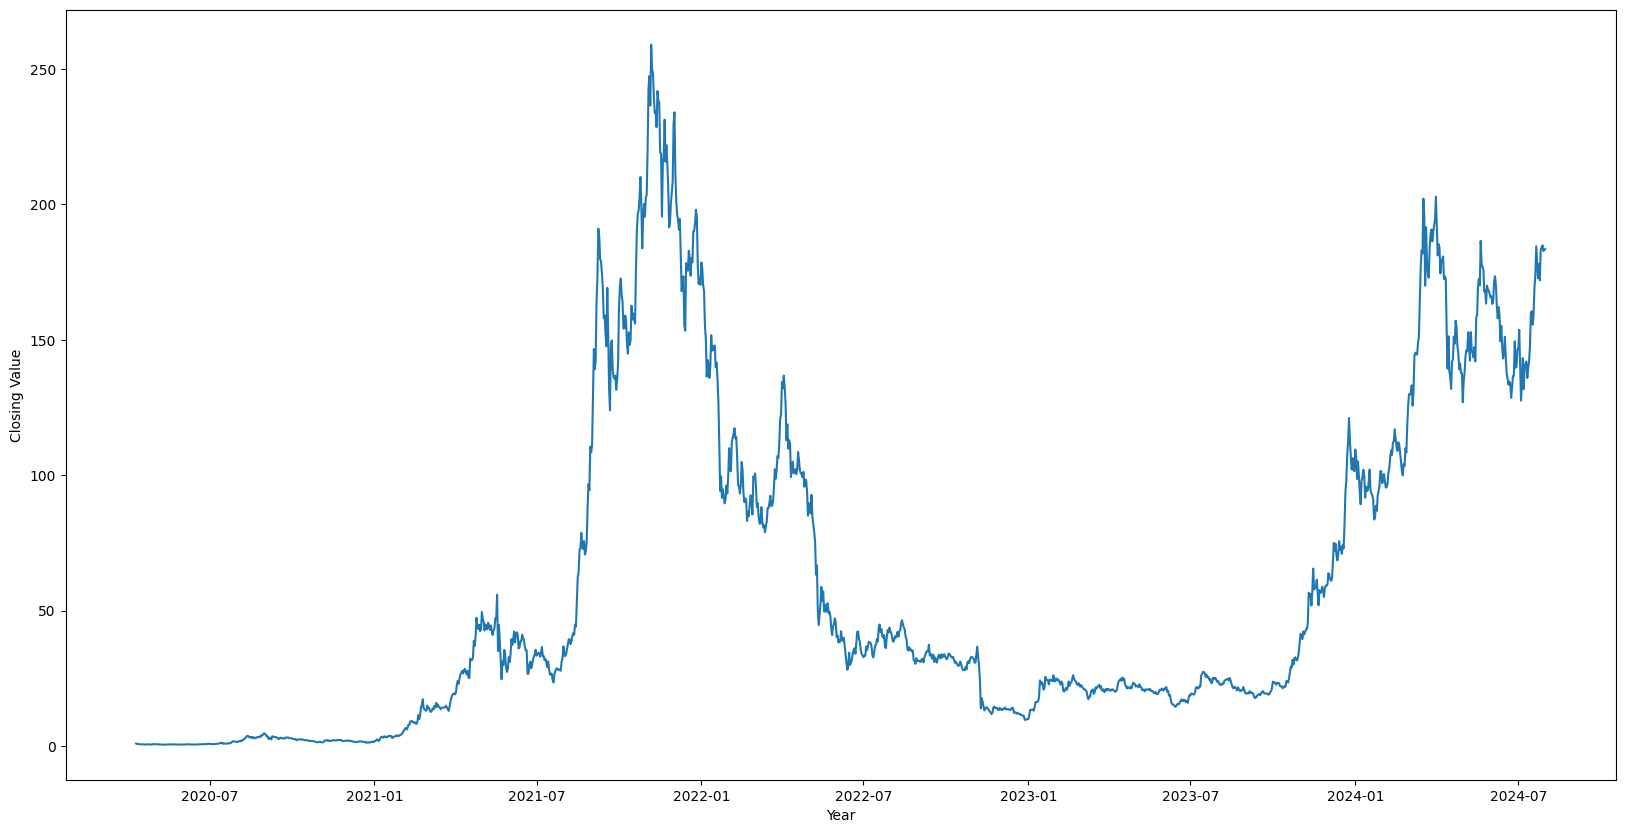

In [107]:
SOL=SOL['Close'].copy()
plt.figure(figsize=(20,10))
plt.xlabel("Year")
plt.ylabel("Closing Value")
plt.plot(SOL)

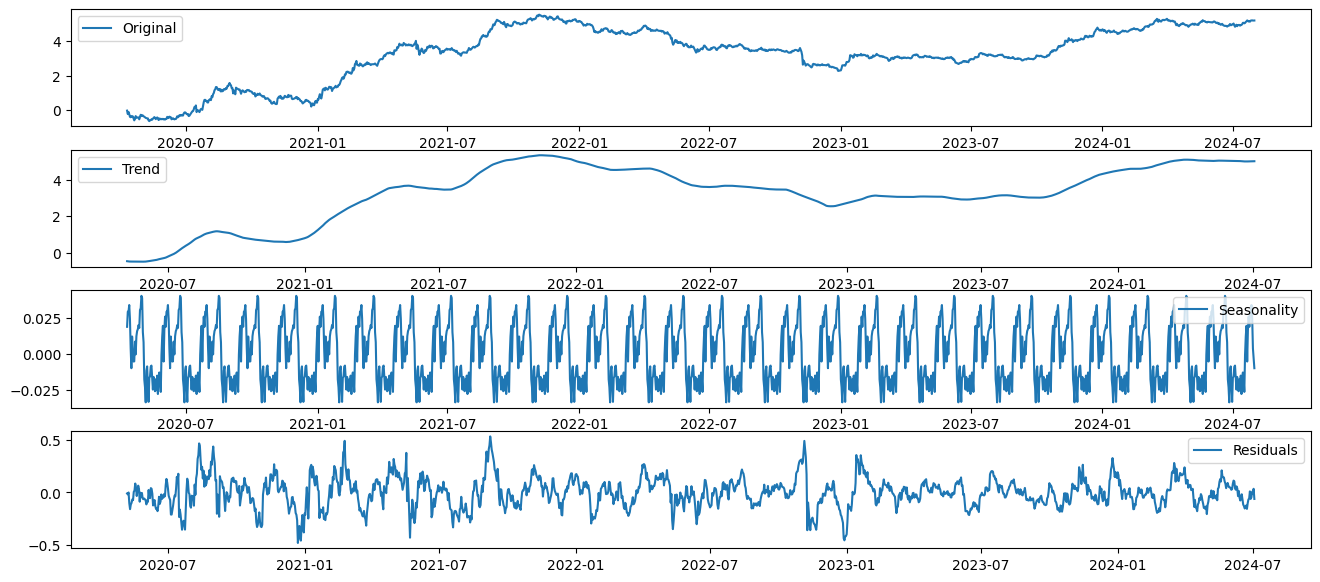

In [108]:
SOL=np.log(SOL)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(SOL,period=54)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(SOL, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

train = SOL.iloc[:len(SOL)-365]
test = SOL.iloc[len(SOL)-365:]

In [109]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(train, autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic            -1.974353
p-value                    0.297931
Lags Used                  1.000000
No. of Obs              1206.000000
Critical Value (1%)       -3.435784
Critical Value (5%)       -2.863940
Critical Value (10%)      -2.568048
dtype: float64


In [110]:
from statsmodels.graphics.tsaplots import plot_acf

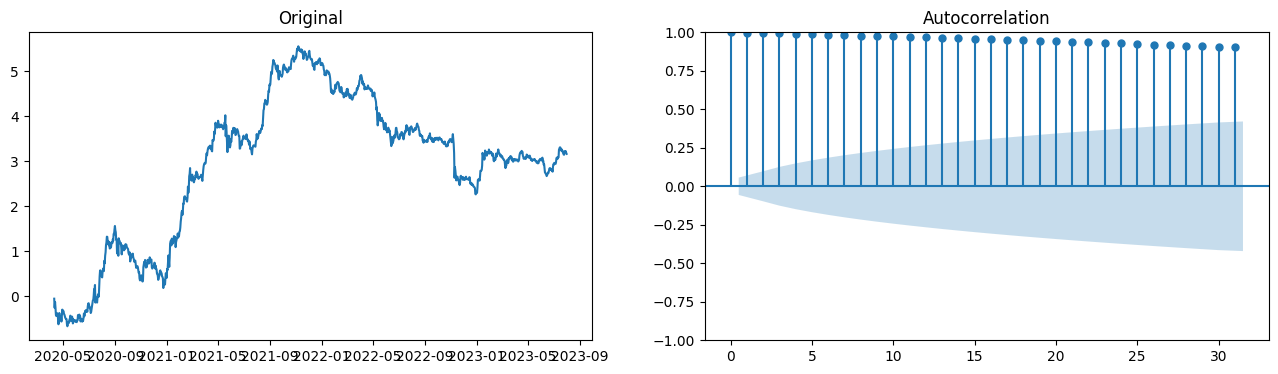

In [111]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(train)
ax1.set_title("Original")
plot_acf(train,ax=ax2);

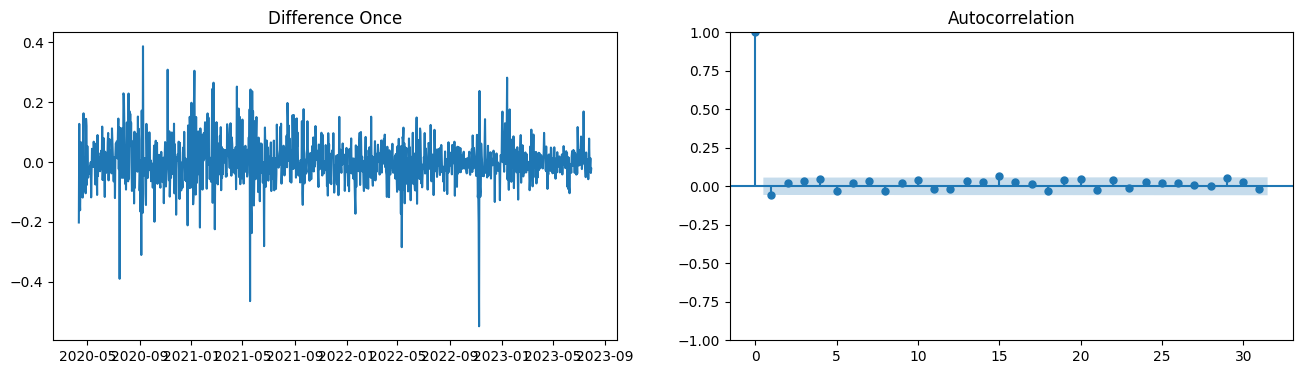

In [112]:
diff=train.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference Once")
plot_acf(diff,ax=ax2);

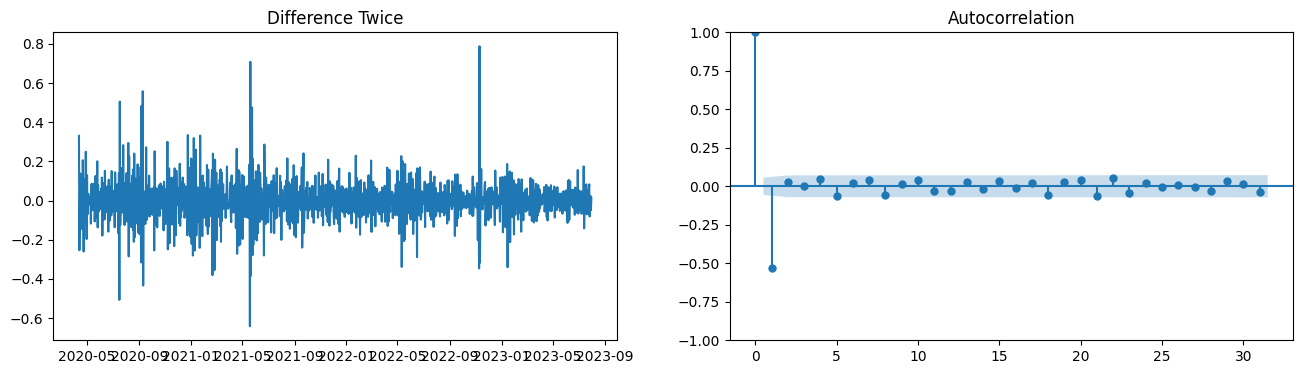

In [113]:
diff=train.diff().diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference Twice")
plot_acf(diff,ax=ax2);

In [114]:
from statsmodels.graphics.tsaplots import plot_pacf

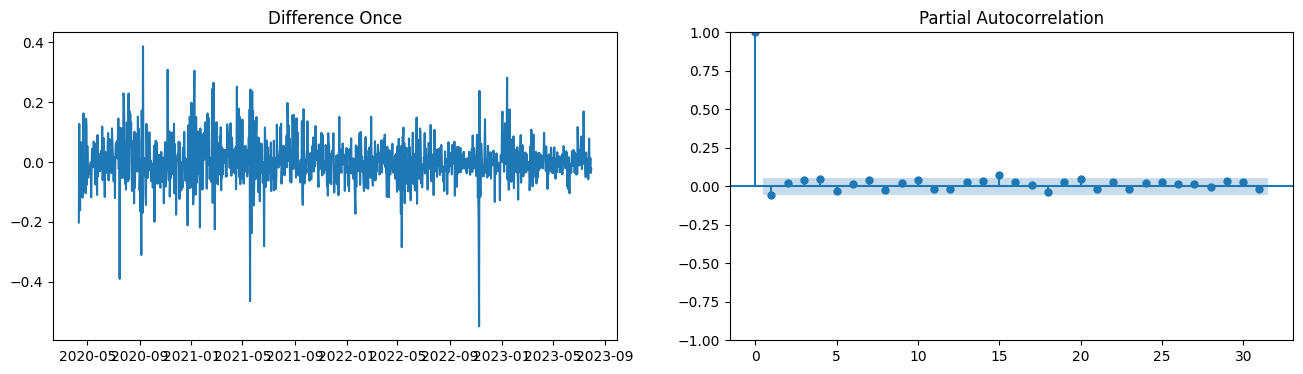

In [115]:
diff=train.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference Once")
ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2);

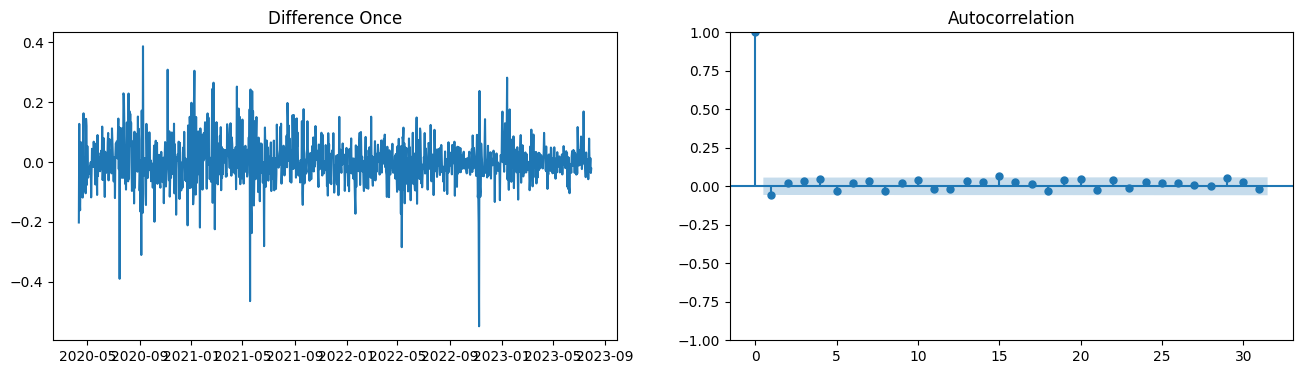

In [116]:
diff=train.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference Once")
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2);

In [117]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [118]:
stepwise_fit=auto_arima(train,trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=2.47 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-1929.029, Time=0.34 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-2333.987, Time=0.23 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.64 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-2500.548, Time=0.86 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=-2594.780, Time=0.63 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=-2621.476, Time=0.68 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=-2655.796, Time=0.81 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=5.26 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=4.20 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=-2653.802, Time=1.67 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit time: 17.812 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1208
Model:               SARIMAX(5, 2, 0)   Log Likelihood                1333.898
Date:                Wed, 31 Jul 2024   AIC                          -2655.796
Time:                        13:02:39   BIC                          -2625.226
Sample:                    04-10-2020   HQIC                         -2644.283
                         - 07-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8989      0.019    -47.875      0.000      -0.936      -0.862
ar.L2         -0.7201      0.026    -27.318      0.000      -0.772      -0.668
ar.L3         -0.5168      0.027    -18.801      0.000      -0.571      -0.463
ar.L4         -0.3043      0.026    -11.493      0.000      -0.356      -0.252
ar.L5         -0.1730      0.021     -8.065      0.000      -0.215      -0.131
sigma2         0.0064      0.000     45.896      0.000       0.006       0.007
===================================================================================
Ljung-Box (L1) (Q):                   0.80   Jarque-Bera (JB):              1509.36
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               0.42   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [119]:
from statsmodels.tsa.arima.model import ARIMA

In [120]:
model=ARIMA(train, order=(0,1,0))
results=model.fit()

In [121]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1208
Model:                 ARIMA(0, 1, 0)   Log Likelihood                1414.619
Date:                Wed, 31 Jul 2024   AIC                          -2827.238
Time:                        13:02:39   BIC                          -2822.142
Sample:                    04-10-2020   HQIC                         -2825.319
                         - 07-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0056      0.000     48.880      0.000       0.005       0.006
Ljung-Box (L1) (Q):                   3.60   Jarque-Bera (JB):              1811.86
Prob(Q):                              0.06   Pr

In [122]:
residuals=pd.DataFrame(results.resid)

(array([0.01767387, 0.00883694, 0.02651081, 0.07953244, 0.86601986,
        5.29332546, 3.59663349, 0.6627703 , 0.09720631, 0.02651081]),
 array([-0.54958211, -0.45590547, -0.36222883, -0.2685522 , -0.17487556,
        -0.08119892,  0.01247771,  0.10615435,  0.19983099,  0.29350762,
         0.38718426]),
 <BarContainer object of 10 artists>)

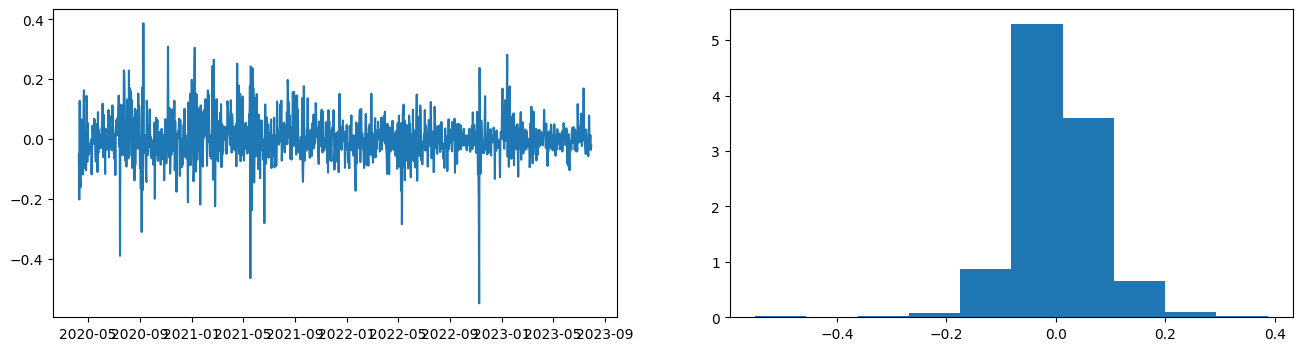

In [123]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(residuals)
ax2.hist(residuals,density=True)

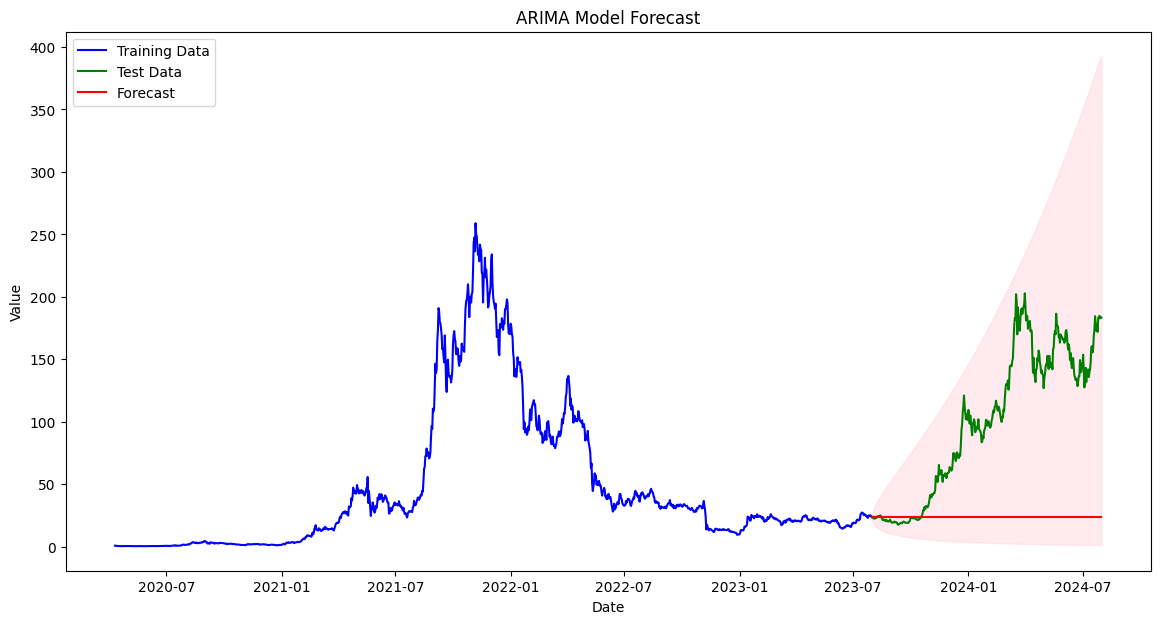

In [124]:
forecast = results.get_forecast(steps=len(test))
forecast_index = test.index
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()
# Plotting
plt.figure(figsize=(14, 7))

# Plot training data
plt.plot(train.index, np.exp(train), label='Training Data', color='blue')

# Plot test data
plt.plot(test.index, np.exp(test), label='Test Data', color='green')

# Plot forecasts
plt.plot(test.index, np.exp(forecast_mean), label='Forecast', color='red')
plt.fill_between(forecast_index, np.exp(forecast_conf_int.iloc[:, 0]), np.exp(forecast_conf_int.iloc[:, 1]), color='pink', alpha=0.3)
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [125]:
from statsmodels.tools.eval_measures import rmse
print("Root Mean Squared Error between actual and  predicted values: ",rmse(forecast_mean,test))
print("Mean Value of Test Dataset:", test.mean())

Root Mean Squared Error between actual and  predicted values:  1.4241265444948383
Mean Value of Test Dataset: 4.3458111530876025


In [126]:
from sklearn.metrics import r2_score

r2 = r2_score(test, forecast_mean)
print("R-squared:", r2)

R-squared: -2.183743564979057


In [127]:
train = SOL.iloc[len(SOL)-365:len(SOL)-100]
test = SOL.iloc[len(SOL)-100:]

In [128]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(train, autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic           -0.488720
p-value                   0.894199
Lags Used                 0.000000
No. of Obs              264.000000
Critical Value (1%)      -3.455365
Critical Value (5%)      -2.872551
Critical Value (10%)     -2.572638
dtype: float64


In [129]:
stepwise_fit=auto_arima(train,trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-839.480, Time=1.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-842.360, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-840.371, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-840.372, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-839.105, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-838.372, Time=0.24 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 2.006 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  265
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 423.180
Date:                Wed, 31 Jul 2024   AIC                           -842.360
Time:                        13:02:43   BIC                           -835.208
Sample:                    08-01-2023   HQIC                          -839.486
                         - 04-21-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0069      0.003      2.251      0.024       0.001       0.013
sigma2         0.0024      0.000     14.319      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                23.80
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.68   Skew:                             0.38
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [130]:
model=ARIMA(train, order=(0,1,0))
results=model.fit()

In [131]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  265
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 420.552
Date:                Wed, 31 Jul 2024   AIC                           -839.105
Time:                        13:02:44   BIC                           -835.529
Sample:                    08-01-2023   HQIC                          -837.668
                         - 04-21-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0024      0.000     15.012      0.000       0.002       0.003
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                23.80
Prob(Q):                              0.91   Pr

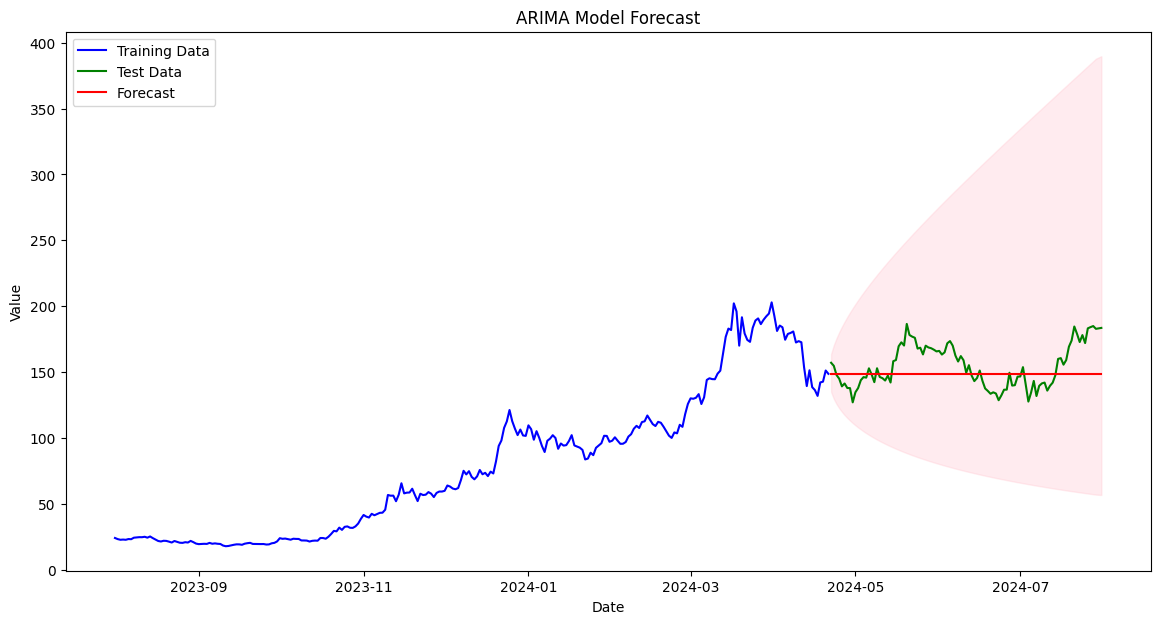

In [132]:
forecast = results.get_forecast(steps=len(test))
forecast_index = test.index
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()
# Plotting
plt.figure(figsize=(14, 7))

# Plot training data
plt.plot(train.index, np.exp(train), label='Training Data', color='blue')

# Plot test data
plt.plot(test.index, np.exp(test), label='Test Data', color='green')

# Plot forecasts
plt.plot(test.index, np.exp(forecast_mean), label='Forecast', color='red')
plt.fill_between(forecast_index, np.exp(forecast_conf_int.iloc[:, 0]), np.exp(forecast_conf_int.iloc[:, 1]), color='pink', alpha=0.3)
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [133]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(forecast_mean,test))
print("Mean Value of Test Dataset:", test.mean())
r2 = r2_score(test, forecast_mean)
print("R-squared:", r2)

Root Mean Squared Error between actual and  predicted values:  0.10691529621081111
Mean Value of Test Dataset: 5.033054036314409
R-squared: -0.09660486128367207
